<h1 style = 'text-align : center; color : red; font-family:verdana; font-weight:bold;font-size:300%'>Drug Overdose Deaths</h1>

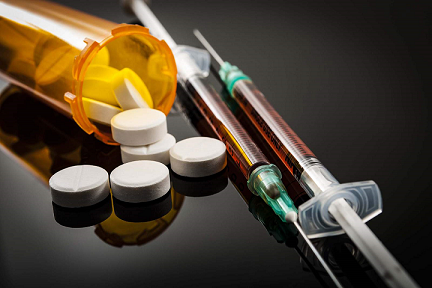

<h2 style = 'font-family:verdana; color:blue;'>Introduction</h2>

**A drug overdose occurs after a person consumes too much of a drug, medication or poison. Overdose can occur accidentally when a person inadvertently takes the incorrect medication or dose, or when they intentionally misuse drugs to get ‘high’ or with the intention of self-harming (e.g. committing suicide). Alcohol, prescription and over the counter medicines, some herbal remedies and illicit drugs can all cause an overdose when taken alone or in combination. Drug overdoses can be life-threatening or cause serious injury such as brain damage. However overdoses can be prevented by avoiding illicit substances and only taking the correct dose of legal drugs. Medicines purchased from a pharmacy are the most common source of drug overdose requiring hospitalisation, yet individuals who misuse prescribed drugs may not perceive they are at risk of overdose because their drugs are legally available and prescribed by their doctor.**

<h2 style = 'font-family:verdana; color:blue'>Importing Libraries</h2>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime as dt
%matplotlib inline

<h2 style = 'font-family:verdana; color:blue;'>Reading Data</h2>

In [ ]:
df = pd.read_csv('/kaggle/input/drug-overdose-deaths/drug_deaths.csv')
df.head()

<h2 style = 'font-family:verdana; color:blue;'>Getting More info of Dataset</h2>

In [ ]:
df.info()

I am going to remove some columns which contains large ammount of null values (OtherSignifican, LocationifOther), with these columns i will remove other columns which are not related to further analysis.

In [ ]:
columns_to_drop = ['Unnamed: 0', 'ID', 'DateType', 'ResidenceCounty', 'ResidenceState', 'COD',
                   'OtherSignifican', 'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo',
                  'DeathCounty', 'LocationifOther', 'Other', 'LocationifOther']
df.drop(columns = columns_to_drop, inplace = True)

In [ ]:
def autolabel(graph):
    for patch in graph.patches:
        height = patch.get_height()
        plt.annotate(height.astype('int64'), xy = (patch.get_x() + patch.get_width()/2, height), xytext = (0, 5),
                    textcoords = 'offset points', ha = 'center', fontsize = 13)

<h2 style = 'font-family:verdana; color:blue'>Year wise Deaths</h2>

In [ ]:
year = pd.to_datetime(df['Date']).dt.year.value_counts()
plt.figure(figsize = (10, 5))
with plt.style.context('fivethirtyeight'):
    graph1 = sns.barplot(x = year.index.astype('int64'), y = year.values.astype('int64'), 
                         palette=sns.cubehelix_palette(8))
plt.tight_layout()
plt.ylabel('Deaths')
autolabel(graph1)
plt.show()

As we see from above figure that deaths due to Drug overdose are increasing year by year.

<h2 style = 'font-family:verdana;color:blue;'> Race wise distrubution of Deaths</h2>

In [ ]:
labels = df['Race'].value_counts().nlargest(4).index
val = df['Race'].value_counts().nlargest(4).values
val = [val[i] for i in [0, 2, 3, 1]]
plt.pie(val, labels = labels, autopct = '%1.1f%%', shadow = True, pctdistance=0.5, startangle=90, radius = 1.3,
       textprops={'fontweight':'bold'})


White people died more than other race, i think it happens because population of white people is more than any race.

<h2 style = 'font-family:verdana;color:blue;'>Age wise Distrubition</h2>

In [ ]:
age = df['Age']
with plt.style.context('fivethirtyeight'):
    plt.hist(age, bins = range(0, 100, 10), edgecolor = 'black', color = 'tab:purple')
    plt.xticks(range(0, 100, 10))
    plt.xlabel('Age')
    plt.ylabel('Deaths')

The people of age between 30-60 are died more compare to other age group.

<h2 style = 'font-family:verdana;color:blue'>Residence city of people who died</h2>

In [ ]:
residence_city = df['ResidenceCity'].copy().dropna()
residence_city_cloud = ' '.join(city for city in residence_city)
wc = WordCloud(width=2500, height=1500).generate(residence_city_cloud)
plt.figure(figsize = (10, 8))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.show()

**WATERBURY, BRIDGEPORT, HARTFORD** these city residence died more compare to other city residents.

<h2 style = 'font-family:verdana;color:blue'>Some Dangerous Drugs</h2>

In [ ]:
drugs = df.loc[::, 'Heroin':'AnyOpioid']
drugs['Fentanyl'] = drugs['Fentanyl'].replace(['1-A', '1 POPS', '1 (PTCH)'], '1')
drugs['AnyOpioid'] = drugs['AnyOpioid'].replace({'N':'0'})
drugs['Morphine_NotHeroin'] = drugs['Morphine_NotHeroin'].replace(['STOLE MEDS', 'PCP NEG', '1ES', 'NO RX BUT STRAWS'], '1')


drugs[['Fentanyl_Analogue', 'Morphine_NotHeroin', 'AnyOpioid', 'Fentanyl']] = drugs[['Fentanyl_Analogue', 'Morphine_NotHeroin', 'AnyOpioid', 'Fentanyl']].astype('int64')
drug = drugs.sum().sort_values(ascending = False).index
frequency = drugs.sum().sort_values(ascending = False).values
plt.figure(figsize = (10, 6))
plt.tight_layout()
with plt.style.context('fivethirtyeight'):
    s = sns.barplot(x = frequency, y = drug, palette=sns.color_palette("Reds_r", 16))
    for patch in s.patches:
        plt.annotate(patch.get_width().astype('int64'), xy = (patch.get_width(), patch.get_y() + patch.get_height()/2),
                    xytext = (1, 0), textcoords = 'offset points', va = 'center', fontsize = 13)
plt.xlabel('Number of times drugs involved in Deaths', fontsize = 13) 

<p>According to study individuals who inject <b>heroin</b> are <b>14</b> times more likely to overdose than individuals who use other drugs.That's why we can see from above figure more number of deaths are due to overdose of <b>heroin</b>.<br/><br/>If we add values of all drugs then it is not equal to the total number(5105) of deaths,because most of the deaths happend due to combination of two or more drugs.

<h2 style='font-family:verdana;color:blue'>Male Vs Female</h2>

In [ ]:
male = df['Sex'].value_counts().values[0]
female = df['Sex'].value_counts().values[1]
plt.pie([male, female], labels = ['Male', 'Female'], autopct = '%1.1f%%', shadow = True, pctdistance=0.5,
        startangle=90, radius = 1.5, wedgeprops={'edgecolor':'white'}, 
        textprops={'fontweight':'bold', 'fontsize':16})
plt.show()

<h2 style = 'font-family:verdana;color:blue;'>Manner Of Death</h2>

In [ ]:
df['MannerofDeath'] = df['MannerofDeath'].replace(['accident', 'ACCIDENT'], 'Accident')
df['MannerofDeath'].value_counts()

Most of the casulities happen *accidently*, and *1*4 pending and *1* natural death.

<h2 style = 'font-family:verdana;color:blue;'>Injury Place</h2>

In [ ]:
df['InjuryPlace'].value_counts().nlargest(5)

Most of the casulities happens in their *residence* only, and some cases in *Hotel* and *residential building*.

<h2 style = 'font-family:verdana;color:blue;'>Description Of Injury</h2>

In [ ]:
description_of_injury = df['DescriptionofInjury'].copy()
DOI = description_of_injury.replace({'substance abuse':'Substance Abuse', 'SUBSTANCE ABUSE':'Substance Abuse',
                              'Substance abuse':'Substance Abuse', 'drug use': 'Drug Use',
                              'Drug use': 'Drug Use', 'Drug abuse':'Drug Abuse', 'Used Heroin':"Heroin Use",
                                     'Heroin use':'Heroin Use', 'Abuse Substance':'Substance Abuse'}).dropna()
DOI_cloud = ' '.join(description for description in DOI)
wc = WordCloud(width=2500, height=1500, scale = 0.5, background_color = 'lavender').generate(DOI_cloud)
plt.figure(figsize = (7, 5))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.show()

<p>Most of the injuries happens due to <b>substance abuse</b>.<br/>Where Substance abuse refers to the harmful or hazardous use of psychoactive substances, including alcohol and illicit drugs.

<h2 style = 'font-family:verdana;color:blue'>Death Cities</h2>

In [ ]:
death_city = df['DeathCity'].copy().dropna()
death_city_cloud = ' '.join(city for city in death_city)
wc = WordCloud(width=2500, height=1500, background_color = 'red').generate(death_city_cloud)
plt.figure(figsize = (9, 7))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.show()

**BRIDGEPORT,  HARTFORD,  WATERBURY,  NEW HAVEN**, these cities seen more deaths comapre to others.

If u like this notebook don't forget to **UPVOTE**.

<div style = 'font-family:verdana;text-align:center;color:blue;font-size:400%;font-weight:bold'>Thank You</div>